In [1]:

import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

%matplotlib inline

In [2]:
def revert_channel(image):
    return image[:,:,::-1]

In [3]:
# // Various color types for detected shirt colors.
# enum                             {cBLACK=0,cWHITE, cGREY, cRED, cORANGE, cYELLOW, cGREEN, cAQUA, cBLUE, cPURPLE, cPINK,  NUM_COLOR_TYPES};
# char* sCTypes[NUM_COLOR_TYPES] = {"Black", "White","Grey","Red","Orange","Yellow","Green","Aqua","Blue","Purple","Pink"};
# uchar cCTHue[NUM_COLOR_TYPES] =    {0,       0,      0,     0,     20,      30,      55,    85,   115,    138,     161};
# uchar cCTSat[NUM_COLOR_TYPES] =    {0,       0,      0,    255,   255,     255,     255,   255,   255,    255,     255};
# uchar cCTVal[NUM_COLOR_TYPES] =    {0,      255,    120,   255,   255,     255,     255,   255,   255,    255,     255};

class COLOR_TYPES(Enum):
    black = 0
    white = 1
    grey = 2
    red = 3
    orange = 4
    yellow = 5
    green = 6
    aqua = 7
    blue = 8
    purple = 9
    pink = 10

colors = ["Black", "White","Grey","Red","Orange","Yellow","Green","Aqua","Blue","Purple","Pink"]
c_hue =    [0,       0,      0,     0,     20,      30,      55,    85,   115,    138,     161]
c_sat =    [0,       0,      0,    255,   255,     255,     255,   255,   255,    255,     255]
c_val =    [0,      255,    120,   255,   255,     255,     255,   255,   255,    255,     255]

def get_pixel_color_type(h, s, v):
    color = 0

    if v < 75:
        color = COLOR_TYPES.black
    elif v > 190 and s < 27:
        color = COLOR_TYPES.white
    elif s < 53 and v < 185:
        color = COLOR_TYPES.grey
    else:
        if h < 14:
            color = COLOR_TYPES.red
        elif h < 25:
            color = COLOR_TYPES.orange
        elif h < 34:
            color = COLOR_TYPES.yellow
        elif h < 73:
            color = COLOR_TYPES.green
        elif h < 102:
            color = COLOR_TYPES.aqua
        elif h < 127:
            color = COLOR_TYPES.blue
        elif h < 149:
            color = COLOR_TYPES.purple
        elif h < 175:
            color = COLOR_TYPES.pink
        else:
            color = COLOR_TYPES.red
            
    return color
        

In [15]:
def calc_color_in_rect(rect, image):
    global colors
#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV_FULL)
    xmin, ymin, xmax, ymax = rect
#     plt.imshow(hsv)
    colors_count = [0] * len(COLOR_TYPES)
    crop_image = image[ymin: ymax, xmin: xmax]
#     plt.imshow(revert_channel(crop_image))
    h = s = v = 0
    for i in range(ymin, ymax):
        for j in range(xmin, xmax):
            h = hsv[i, j, 0]
            s = hsv[i, j, 1]
            v = hsv[i, j, 2]
            
            color_type = get_pixel_color_type(h, s, v)
            colors_count[color_type.value] += 1
    print(h,s,v)
    a = np.argmax(np.asarray(colors_count))
    print(colors[a])
    


(892, 282, 3)
(141, 347, 181, 387)


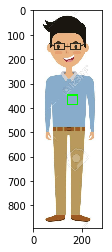

In [13]:
image = cv2.imread('image_1.png')
print(image.shape)
i_h, i_w = image.shape[:2]
rect = (i_w//2, i_h//3 + 50, i_w//2+40, i_h//3+90) #(xmin, ymin, xmax, ymax)
print(rect)
xmin, ymin, xmax, ymax = rect
copy_image = image.copy()
cv2.rectangle(copy_image,(xmin,ymin),(xmax,ymax),(0,255,0),3)
plt.imshow(revert_channel(copy_image))

In [16]:
calc_color_in_rect(rect, image)

148 84 203
Purple


In [ ]:
print